In [1]:
# Add some comments
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [15]:
filename = "/Users/weiyangbao/Desktop/sill12/state_010.nc"

In [20]:
# Define a function to calculate volume flux above the sill crest
def Vflux(filename, sill_depth):
    
    from scipy.interpolate import interp2d
    
    state = xr.open_dataset(filename)
    # Grid info
    Zgrid = int(sill_depth / 3)
    grid_size = 200 * 3
    y = state.Y.data[1:10]
    z0 = state.Z.data
    z1 = np.arange(-1.5,-150,-3)
    
    Qs_out = np.empty(len(state.T))
    Qs_in = np.empty(len(state.T))
    for t in range(len(state.T)):
        u = state.U.isel(T = t)        
        u_sill = (u.data[:, 1:10, 29]) # Profile above the sill crest
        f_u = interp2d(y, z0, u_sill) # Interpolate in Z direction
        u_sill_interp = f_u(y, z1)
        Qs = u_sill_interp[-Zgrid:,:] * grid_size
        Qs_out[t] = Qs[Qs > 0].sum()
        Qs_in[t] = -Qs[Qs < 0].sum()
        
    return (Qs_out, Qs_in)

In [22]:
sill_depth = 12
Qs_out, Qs_in = Vflux(filename, sill_depth)

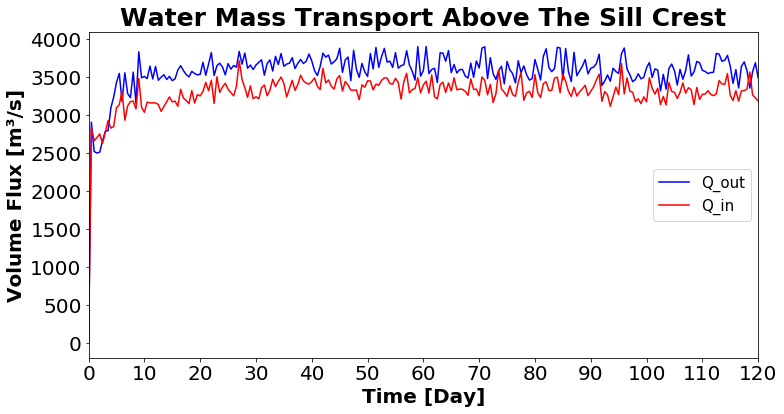

In [18]:

fig, ax =plt.subplots(figsize=(12,6))
ax.set_xlim([0,240])
ax.set_xticks(np.linspace(0,240,13))
ax.set_xticklabels(np.linspace(0,120,13, dtype = int), size = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Time [Day]", size = 20, weight = 'bold')
plt.ylabel("Volume Flux [m\u00B3/s]", size = 20, weight = 'bold')
#plt.tick_params(axis="y", labelcolor="b")
plt.plot(Qs_out, "b-", linewidth=1.5, label='Q_out')
plt.plot(Qs_in, "r-", linewidth=1.5, label='Q_in')
plt.legend(loc = 'right', fontsize = 15)
plt.title("Water Mass Transport Above The Sill Crest", size = 25, weight = 'bold')
#fig.autofmt_xdate(rotation=50)
  
plt.show()